# <font color='Orange'>Hope everyone who reads this notebook finds it helpful. Do upvote it. Thank You 🙏😃

# <font color ='torcous'>EMNIST Letter Dataset with 96.7% accuracy 

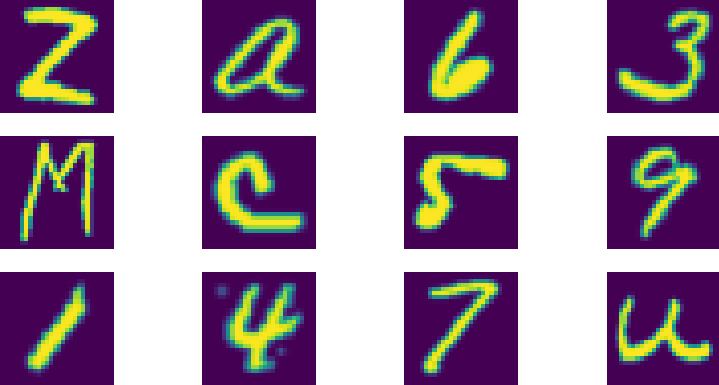

## <font color='#00B2FF'> The EMNIST dataset is a set of handwritten character digits derived from the NIST Special Database 19 and converted to a 28x28 pixel image format and dataset structure that directly matches the MNIST dataset .


## Here we are specifically using EMNIST letter dataset. So Let's get started

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emnist/emnist-letters-mapping.txt
/kaggle/input/emnist/emnist-letters-test.csv
/kaggle/input/emnist/emnist-mnist-mapping.txt
/kaggle/input/emnist/emnist-digits-train.csv
/kaggle/input/emnist/emnist-bymerge-mapping.txt
/kaggle/input/emnist/emnist-balanced-train.csv
/kaggle/input/emnist/emnist-digits-test.csv
/kaggle/input/emnist/emnist-balanced-test.csv
/kaggle/input/emnist/emnist-mnist-test.csv
/kaggle/input/emnist/emnist-letters-train.csv
/kaggle/input/emnist/emnist-byclass-train.csv
/kaggle/input/emnist/emnist-bymerge-test.csv
/kaggle/input/emnist/emnist-balanced-mapping.txt
/kaggle/input/emnist/emnist-mnist-train.csv
/kaggle/input/emnist/emnist-digits-mapping.txt
/kaggle/input/emnist/emnist-bymerge-train.csv
/kaggle/input/emnist/emnist-byclass-test.csv
/kaggle/input/emnist/emnist-byclass-mapping.txt
/kaggle/input/emnist/emnist_source_files/emnist-digits-test-labels-idx1-ubyte
/kaggle/input/emnist/emnist_source_files/emnist-bymerge-train-labels-idx1-ubyte
/kaggle/input/

In [2]:
#/kaggle/input/emnist/emnist-letters-mapping.txt
testing_letter = pd.read_csv('/kaggle/input/emnist/emnist-letters-test.csv')
training_letter = pd.read_csv('/kaggle/input/emnist/emnist-letters-train.csv')

In [3]:
print(training_letter.shape)
print(testing_letter.shape)

(88799, 785)
(14799, 785)


In [4]:
#training_letters
y1 = np.array(training_letter.iloc[:,0].values)
x1 = np.array(training_letter.iloc[:,1:].values)
#testing_labels
y2 = np.array(testing_letter.iloc[:,0].values)
x2 = np.array(testing_letter.iloc[:,1:].values)
print(y1.shape)
print(x1.shape)

(88799,)
(88799, 784)


## Let's see what type of images we have got. 

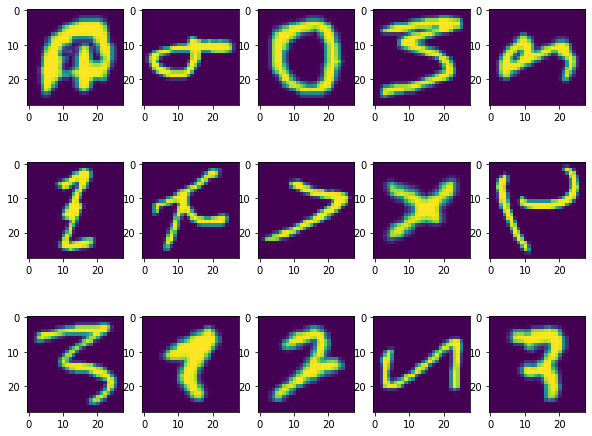

In [5]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]))


In [6]:
import tensorflow as tf

# Preprocesssing

# 1. Normalisation and reshaping of data

### Before feeding in the data to the model we will normalise and reshape the data given to us. This will decrease the complexity of the models and make the model work efficiently as less complex numbers will be there to process.

In [7]:
# Normalise and reshape data
train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

In [8]:
# Transform labels
number_of_classes = 37

y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

# Lets create a CNN for the classification of these random images.

In [9]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Model
#from tensorflow.keras.layers import Dense,Dropout,MaxPooling2D,Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2,random_state = 42)

In [12]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## Adding Callback API's to save best weights and change lr

In [14]:
 
MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [15]:
history = model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Train on 71039 samples, validate on 17760 samples
Epoch 1/10
70976/71039 [============================>.] - ETA: 0s - loss: 0.5601 - accuracy: 0.8261
Epoch 00001: val_accuracy improved from -inf to 0.88986, saving model to Best_points.h5
71039/71039 [==============================] - 62s 873us/sample - loss: 0.5601 - accuracy: 0.8261 - val_loss: 0.3396 - val_accuracy: 0.8899
Epoch 2/10
70944/71039 [============================>.] - ETA: 0s - loss: 0.2822 - accuracy: 0.9057
Epoch 00002: val_accuracy improved from 0.88986 to 0.90276, saving model to Best_points.h5
71039/71039 [==============================] - 59s 828us/sample - loss: 0.2822 - accuracy: 0.9057 - val_loss: 0.2916 - val_accuracy: 0.9028
Epoch 3/10
71008/71039 [============================>.] - ETA: 0s - loss: 0.2101 - accuracy: 0.9265
Epoch 00003: val_accuracy improved from 0.90276 to 0.90411, saving model to Best_points.h5
71039/71039 [==============================] - 59s 835us/sample - loss: 0.2100 - accuracy: 0.9266 - 

## Let's plot Accuracy vs Val_Accuracy to further evaluation..

In [16]:
import seaborn as sns

Text(0, 0.5, 'Accuray')

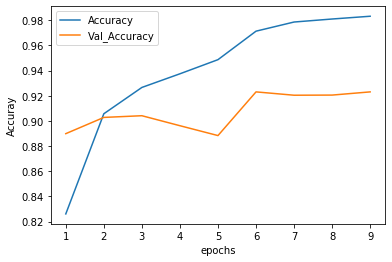

In [17]:
q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

## Changing the test_split size to 0.15 to see if validation score increases or not

In [18]:
train_x2,test_x2,train_y2,test_y2 = train_test_split(train_images,y1,test_size=0.15,random_state = 42)

In [19]:
history1 = model.fit(train_x2,train_y2,epochs=10,validation_data=(test_x2,test_y2))

Train on 75479 samples, validate on 13320 samples
Epoch 1/10
75479/75479 [==============================] - 62s 815us/sample - loss: 0.0644 - accuracy: 0.9766 - val_loss: 0.2766 - val_accuracy: 0.9257
Epoch 2/10
75479/75479 [==============================] - 62s 816us/sample - loss: 0.0505 - accuracy: 0.9804 - val_loss: 0.2905 - val_accuracy: 0.9242
Epoch 3/10
75479/75479 [==============================] - 60s 796us/sample - loss: 0.0440 - accuracy: 0.9822 - val_loss: 0.3006 - val_accuracy: 0.9248
Epoch 4/10
75479/75479 [==============================] - 60s 796us/sample - loss: 0.0397 - accuracy: 0.9835 - val_loss: 0.3151 - val_accuracy: 0.9247
Epoch 5/10
75479/75479 [==============================] - 61s 812us/sample - loss: 0.0360 - accuracy: 0.9847 - val_loss: 0.3338 - val_accuracy: 0.9251
Epoch 6/10
75479/75479 [==============================] - 61s 815us/sample - loss: 0.0333 - accuracy: 0.9857 - val_loss: 0.3510 - val_accuracy: 0.9245
Epoch 7/10
75479/75479 [====================

Text(0, 0.5, 'Accuray')

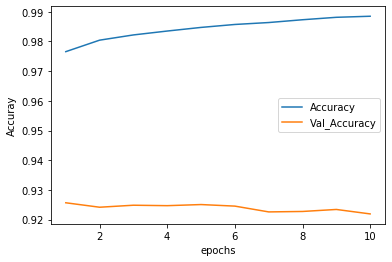

In [20]:
q = len(history1.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history1.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history1.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

# As the validation score score went down we won't be changing the test_split size. 
# Thus the above model is better than the latter one.

## Hope everyone who reads this notebook finds it helpful. 
## Do upvote it. Thank You🙏😃

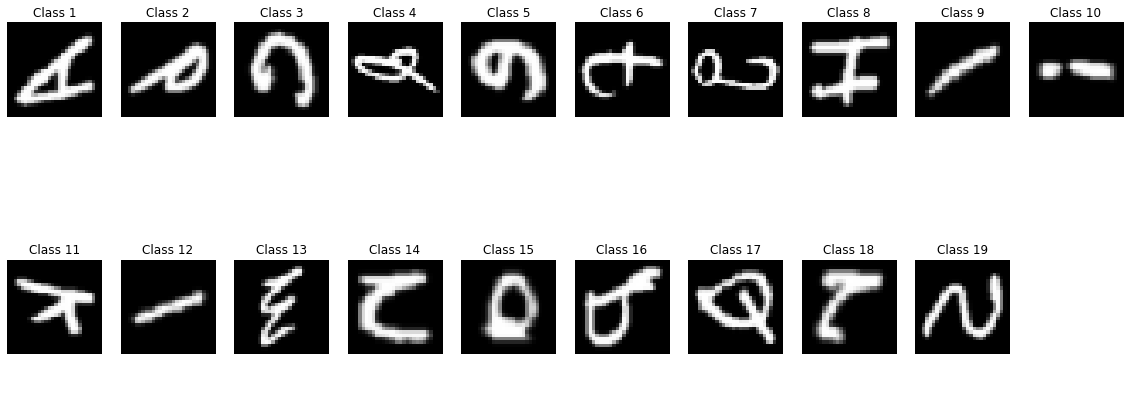

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
emnist_data = pd.read_csv('/kaggle/input/emnist/emnist-letters-test.csv')

# Extract class labels and image data
class_labels = emnist_data.iloc[:, 0].values
image_data = emnist_data.iloc[:, 1:].values

# Normalize pixel values
image_data = image_data / 255.0

# Reshape image data to 28x28
image_data_reshaped = image_data.reshape(-1, 28, 28)

# Dictionary to store one image for each class
class_images = {}

# Iterate through each class and find the first image
unique_classes = np.unique(class_labels)
num_classes = len(unique_classes)

# Determine the number of rows and columns for subplots dynamically
num_rows = (num_classes + 9) // 10  # 10 columns, adjust as needed
num_cols = min(10, num_classes)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 8))

for i, ax in zip(unique_classes, axes.flat):
    class_image = image_data_reshaped[class_labels == i][0]
    ax.imshow(class_image, cmap='gray')
    ax.set_title(f'Class {i}')
    ax.axis('off')

# Hide empty subplots
for i in range(num_classes, num_rows * num_cols):
    axes.flat[i].axis('off')

plt.show()


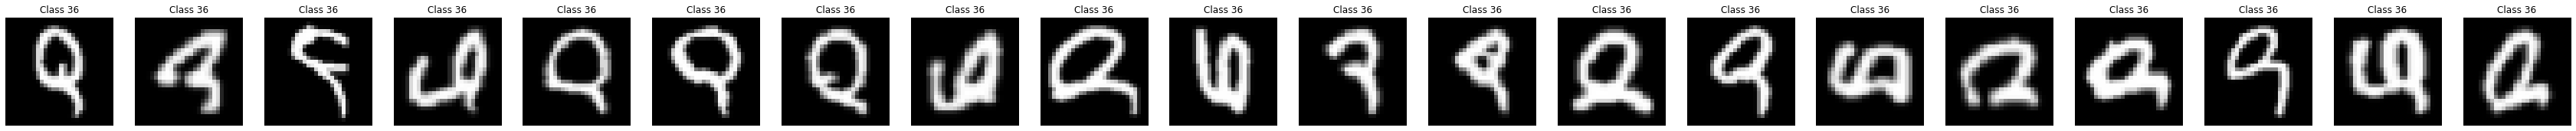

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
emnist_data = pd.read_csv('/kaggle/input/emnist/emnist-balanced-test.csv')

# Extract class labels and image data
class_labels = emnist_data.iloc[:, 0].values
image_data = emnist_data.iloc[:, 1:].values

# Normalize pixel values
image_data = image_data / 255.0

# Reshape image data to 28x28
image_data_reshaped = image_data.reshape(-1, 28, 28)

# Specify the class label you want to plot more examples of
desired_class = 36  # Change this to the desired class label

# Find indices of images belonging to the desired class
class_indices = np.where(class_labels == desired_class)[0]

# Plot multiple images belonging to the desired class
num_examples = min(len(class_indices), 20)  # Plot up to 5 examples, adjust as needed
fig, axes = plt.subplots(1, num_examples, figsize=(num_examples * 3, 3))

for i, idx in enumerate(class_indices[:num_examples]):
    ax = axes[i]
    ax.imshow(image_data_reshaped[idx], cmap='gray')
    ax.set_title(f'Class {class_labels[idx]}')
    ax.axis('off')

plt.show()